# Анализ accuracy для каждого из классов

Анализируется аккураси для пар схожих и различных объектов, чтобы понять, как модель ведет себя на каждом из классов 

In [1]:
import albumentations as A
from torch.utils.data import DataLoader, random_split

from src.config import MOT20_EXT_FIRST_AXIS_MEAN, MOT20_EXT_SECOND_AXIS_MEAN
from src.train import get_dataset, get_loaders
from src.train.utils import get_config, get_experiments, get_model, display_images
from src.transforms import get_norm_transform, get_resize_transform

/home/nick/reidentification/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nick/reidentification/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Загрузка результата

In [2]:
df = get_experiments()
df = df[(df['model_name'] == 'basic_cnn') & (df['dataset_config'] == 'mot20_ext-v1c')]
best = df[df['best_val_acc'] == df['best_val_acc'].max()]
model = get_model(best)

## Проверка на тесте

### Загрузка данных - 0.01 тестового набора

In [3]:
dataset_config = get_config('mot20_ext-test-v1')
dataset_config

{'dataset_config': 'mot20_ext-test-v1',
 'dataset': 'mot20_ext_test',
 'dataset_use': 0.01,
 'train_proportion': 1.0,
 'val_proportion': 0.0,
 'test_proportion': 0.0,
 'batch_size': 1,
 'extra_parameters': {'visibility_threshold': 1.0,
  'negative_proportion': 0.5,
  'frame_distance': 0}}

In [4]:
resize_transform = get_resize_transform((MOT20_EXT_FIRST_AXIS_MEAN, MOT20_EXT_SECOND_AXIS_MEAN)) 
norm_transform = get_norm_transform()
transform = A.Compose([resize_transform, norm_transform])

In [5]:
# test_loader = get_loaders(config=dataset_config, transform=transform)
dataset, _ = random_split(get_dataset(dataset_config, transform), [0.01, 0.99])

In [24]:
test_loader = DataLoader(dataset)
len(test_loader)

695

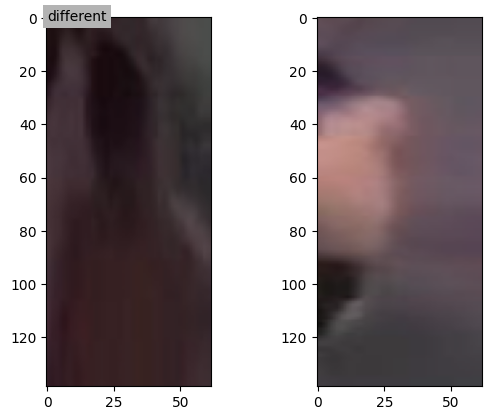

In [27]:
batch = next(iter(test_loader))
x1, x2, actual_distance = batch[0][0], batch[1][0], batch[2][0]
display_images((x1, x2), actual_distance)